In [112]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [156]:
#Read in the csv file and convert to a Pandas dataframe
df_2015 = pd.read_csv("Data/2015.csv")
df_2016 = pd.read_csv("Data/2016.csv")
df_2017 = pd.read_csv("Data/2017.csv")
df_2018 = pd.read_csv("Data/2018.csv")
df_2019 = pd.read_csv("Data/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df_2015.head(2)


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201

In [5]:
df_2015.shape

(158, 12)

In [6]:
df_2016.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [7]:
df_2016.shape

(157, 13)

In [8]:
df_2017.head(2)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707

In [9]:
df_2017.shape

(155, 12)

In [114]:
df_2018.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions of corruption  
0                      0.393  
1                      0.340

In [11]:
df_2018.shape

(156, 9)

In [12]:
df_2019.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   

   Perceptions of corruption  
0                      0.393  
1                      0.410

In [13]:
df_2019.shape

(156, 9)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [14]:
#checking the info for the data frame for the year 2015
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [15]:
#checking the info for the data frame for the year 2016
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [16]:
#checking the info for the data frame for the year 2017
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [17]:
#checking the info for the data frame for the year 2018
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [18]:
#checking the info for the data frame for the year 2019
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [19]:
#getting the decribtion for all the numurical columns for the year 2015
df_2015.describe().T

count       mean        std      min  \
Happiness Rank                 158.0  79.493671  45.754363  1.00000   
Happiness Score                158.0   5.375734   1.145010  2.83900   
Standard Error                 158.0   0.047885   0.017146  0.01848   
Economy (GDP per Capita)       158.0   0.846137   0.403121  0.00000   
Family                         158.0   0.991046   0.272369  0.00000   
Health (Life Expectancy)       158.0   0.630259   0.247078  0.00000   
Freedom                        158.0   0.428615   0.150693  0.00000   
Trust (Government Corruption)  158.0   0.143422   0.120034  0.00000   
Generosity                     158.0   0.237296   0.126685  0.00000   
Dystopia Residual              158.0   2.098977   0.553550  0.32858   

                                     25%        50%         75%        max  
Happiness Rank                 40.250000  79.500000  118.750000  158.00000  
Happiness Score                 4.526000   5.232500    6.243750    7.58700  
Standard Error                  0.037268   0.043940    0.052300    0.13693  
Economy (GDP per Capita)        0.545808   0.910245    1.158448    1.69042  
Family                          0.856823   1.029510    1.214405    1.40223  
Health (Life Expectancy)        0.439185   0.696705    0.811013    1.02525  
Freedom                         0.328330   0.435515    0.549092    0.66973  
Trust (Government Corruption)   0.061675   0.107220    0.180255    0.55191  
Generosity                      0.150553   0.216130    0.309883    0.79588  
Dystopia Residual               1.759410   2.095415    2.462415    3.60214

In [20]:
#getting the decribtion for all the numurical columns for the year 2016
df_2016.describe().T

count       mean        std      min       25%  \
Happiness Rank                 157.0  78.980892  45.466030  1.00000  40.00000   
Happiness Score                157.0   5.382185   1.141674  2.90500   4.40400   
Lower Confidence Interval      157.0   5.282395   1.148043  2.73200   4.32700   
Upper Confidence Interval      157.0   5.481975   1.136493  3.07800   4.46500   
Economy (GDP per Capita)       157.0   0.953880   0.412595  0.00000   0.67024   
Family                         157.0   0.793621   0.266706  0.00000   0.64184   
Health (Life Expectancy)       157.0   0.557619   0.229349  0.00000   0.38291   
Freedom                        157.0   0.370994   0.145507  0.00000   0.25748   
Trust (Government Corruption)  157.0   0.137624   0.111038  0.00000   0.06126   
Generosity                     157.0   0.242635   0.133756  0.00000   0.15457   
Dystopia Residual              157.0   2.325807   0.542220  0.81789   2.03171   

                                    50%        75%        max  
Happiness Rank                 79.00000  118.00000  157.00000  
Happiness Score                 5.31400    6.26900    7.52600  
Lower Confidence Interval       5.23700    6.15400    7.46000  
Upper Confidence Interval       5.41900    6.43400    7.66900  
Economy (GDP per Capita)        1.02780    1.27964    1.82427  
Family                          0.84142    1.02152    1.18326  
Health (Life Expectancy)        0.59659    0.72993    0.95277  
Freedom                         0.39747    0.48453    0.60848  
Trust (Government Corruption)   0.10547    0.17554    0.50521  
Generosity                      0.22245    0.31185    0.81971  
Dystopia Residual               2.29074    2.66465    3.83772

In [21]:
#getting the decribtion for all the numurical columns for the year 2017
df_2017.describe().T

count       mean        std       min  \
Happiness.Rank                 155.0  78.000000  44.888751  1.000000   
Happiness.Score                155.0   5.354019   1.131230  2.693000   
Whisker.high                   155.0   5.452326   1.118542  2.864884   
Whisker.low                    155.0   5.255713   1.145030  2.521116   
Economy..GDP.per.Capita.       155.0   0.984718   0.420793  0.000000   
Family                         155.0   1.188898   0.287263  0.000000   
Health..Life.Expectancy.       155.0   0.551341   0.237073  0.000000   
Freedom                        155.0   0.408786   0.149997  0.000000   
Generosity                     155.0   0.246883   0.134780  0.000000   
Trust..Government.Corruption.  155.0   0.123120   0.101661  0.000000   
Dystopia.Residual              155.0   1.850238   0.500028  0.377914   

                                     25%        50%         75%         max  
Happiness.Rank                 39.500000  78.000000  116.500000  155.000000  
Happiness.Score                 4.505500   5.279000    6.101500    7.537000  
Whisker.high                    4.608172   5.370032    6.194600    7.622030  
Whisker.low                     4.374955   5.193152    6.006527    7.479556  
Economy..GDP.per.Capita.        0.663371   1.064578    1.318027    1.870766  
Family                          1.042635   1.253918    1.414316    1.610574  
Health..Life.Expectancy.        0.369866   0.606042    0.723008    0.949492  
Freedom                         0.303677   0.437454    0.516561    0.658249  
Generosity                      0.154106   0.231538    0.323762    0.838075  
Trust..Government.Corruption.   0.057271   0.089848    0.153296    0.464308  
Dystopia.Residual               1.591291   1.832910    2.144654    3.117485

In [22]:
#getting the decribtion for all the numurical columns for the year 2018
df_2018.describe().T

count       mean        std    min       25%  \
Overall rank                  156.0  78.500000  45.177428  1.000  39.75000   
Score                         156.0   5.375917   1.119506  2.905   4.45375   
GDP per capita                156.0   0.891449   0.391921  0.000   0.61625   
Social support                156.0   1.213237   0.302372  0.000   1.06675   
Healthy life expectancy       156.0   0.597346   0.247579  0.000   0.42225   
Freedom to make life choices  156.0   0.454506   0.162424  0.000   0.35600   
Generosity                    156.0   0.181006   0.098471  0.000   0.10950   
Perceptions of corruption     155.0   0.112000   0.096492  0.000   0.05100   

                                  50%        75%      max  
Overall rank                  78.5000  117.25000  156.000  
Score                          5.3780    6.16850    7.632  
GDP per capita                 0.9495    1.19775    2.096  
Social support                 1.2550    1.46300    1.644  
Healthy life expectancy        0.6440    0.77725    1.030  
Freedom to make life choices   0.4870    0.57850    0.724  
Generosity                     0.1740    0.23900    0.598  
Perceptions of corruption      0.0820    0.13700    0.457

In [23]:
#getting the decribtion for all the numurical columns for the year 2019
df_2019.describe().T

count       mean        std    min       25%  \
Overall rank                  156.0  78.500000  45.177428  1.000  39.75000   
Score                         156.0   5.407096   1.113120  2.853   4.54450   
GDP per capita                156.0   0.905147   0.398389  0.000   0.60275   
Social support                156.0   1.208814   0.299191  0.000   1.05575   
Healthy life expectancy       156.0   0.725244   0.242124  0.000   0.54775   
Freedom to make life choices  156.0   0.392571   0.143289  0.000   0.30800   
Generosity                    156.0   0.184846   0.095254  0.000   0.10875   
Perceptions of corruption     156.0   0.110603   0.094538  0.000   0.04700   

                                  50%        75%      max  
Overall rank                  78.5000  117.25000  156.000  
Score                          5.3795    6.18450    7.769  
GDP per capita                 0.9600    1.23250    1.684  
Social support                 1.2715    1.45250    1.624  
Healthy life expectancy        0.7890    0.88175    1.141  
Freedom to make life choices   0.4170    0.50725    0.631  
Generosity                     0.1775    0.24825    0.566  
Perceptions of corruption      0.0855    0.14125    0.453

In [24]:
#descriptive statistics for object-type columns in year 2015 
df_2015.describe(include="object").T

count unique                 top freq
Country   158    158         Switzerland    1
Region    158     10  Sub-Saharan Africa   40

In [25]:
#descriptive statistics for object-type columns in year 2016
df_2016.describe(include="object").T

count unique                 top freq
Country   157    157             Denmark    1
Region    157     10  Sub-Saharan Africa   38

In [26]:
#descriptive statistics for object-type columns in year 2017
df_2017.describe(include="object").T

count unique     top freq
Country   155    155  Norway    1

In [27]:
#descriptive statistics for object-type columns in year 2018
df_2018.describe(include="object").T

count unique      top freq
Country or region   156    156  Finland    1

In [28]:
#descriptive statistics for object-type columns in year 2019
df_2019.describe(include="object").T

count unique      top freq
Country or region   156    156  Finland    1

In [29]:
# Display the names of all columns in the df_2015 DataFrame
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [30]:
# Display the names of all columns in the df_2016 DataFrame
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [31]:
# Display the names of all columns in the df_2017 DataFrame
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [32]:
# Display the names of all columns in the df_2018 DataFrame
df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [33]:
# Display the names of all columns in the df_2019 DataFrame
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [34]:
#the first two row of the dataframe df_2015
df_2015.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201

In [35]:
#the first two row of the dataframe df_2016
df_2016.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [36]:
#the first two row of the dataframe df_2017
df_2017.head(2)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707

In [37]:
#the first two row of the dataframe df_2018
df_2018.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions of corruption  
0                      0.393  
1                      0.340

In [38]:
#the first two row of the dataframe df_2019
df_2019.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   

   Perceptions of corruption  
0                      0.393  
1                      0.410

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [39]:
#checking for any dublicates in the year 2015 and then getting the sum for it
df_2015.duplicated().sum()

0

In [40]:
#checking for any dublicates in the year 2017 and then getting the sum for it
df_2016.duplicated().sum()

0

In [41]:
#checking for any dublicates in the year 2017 and then getting the sum for it
df_2017.duplicated().sum()

0

In [42]:
#checking for any dublicates in the year 2018 and then getting the sum for it
df_2018.duplicated().sum()

0

In [43]:
#checking for any dublicates in the year 2019 and then getting the sum for it
df_2019.duplicated().sum()

0

In [44]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [45]:
#Display number missing values per column in the dataset for the year 2015
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [46]:
#Display number missing values per column in the dataset for the year 2016
df_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [47]:
#Display number missing values per column in the dataset for the year 2017
df_2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [115]:
#Display number missing values per column in the dataset for the year 2018
df_2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [116]:
#checking the row that the null occured in
df_2018[df_2018['Perceptions of corruption'].isnull()]

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN

In [93]:
df_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [50]:
#Display number missing values per column in the dataset for the year 2019
df_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [68]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [94]:
# check columns types 
df_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [95]:
df_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [96]:
df_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [157]:
df_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [98]:
df_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [99]:
# go to clean them 

In [3]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [ ]:
# #filled the null with the value -1 because it's a number that isn't in the column
# df_2018['Perceptions of corruption'] = df_2018['Perceptions of corruption'].fillna('-1')
# #fixed the data type fr the column from object to float
# df_2018['Perceptions of corruption'] = df_2018['Perceptions of corruption'].astype(float)

In [ ]:
#since i found a null in Perceptions of corruption in the df for the year 2018
#i will check the values for that column for the uae 
#in the previous years and the years after

In [158]:
df_2015[df_2015['Country']=='United Arab Emirates']

Country                           Region  Happiness Rank  \
19  United Arab Emirates  Middle East and Northern Africa              20   

    Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
19            6.901         0.03729                   1.42727  1.12575   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
19                   0.80925  0.64157                        0.38583   

    Generosity  Dystopia Residual  
19     0.26428            2.24743

In [159]:
df_2016[df_2016['Country']=='United Arab Emirates']

Country                           Region  Happiness Rank  \
27  United Arab Emirates  Middle East and Northern Africa              28   

    Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
27            6.573                      6.494                      6.652   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
27                   1.57352  0.87114                   0.72993  0.56215   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
27                        0.35561     0.26591            2.21507

In [160]:
df_2017[df_2017['Country'] =='United Arab Emirates']

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
20  United Arab Emirates              21            6.648      6.722047   

    Whisker.low  Economy..GDP.per.Capita.   Family  Health..Life.Expectancy.  \
20     6.573952                  1.626343  1.26641                  0.726798   

     Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  
20  0.608345    0.360942                        0.32449           1.734704

In [161]:
df_2018[df_2018['Country or region'] =='United Arab Emirates']

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN

In [162]:
df_2019[df_2019['Country or region'] =='United Arab Emirates']

Overall rank     Country or region  Score  GDP per capita  Social support  \
20            21  United Arab Emirates  6.825           1.503            1.31   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
20                    0.825                         0.598       0.262   

    Perceptions of corruption  
20                      0.182

In [163]:
#took the value that is assosited with the coulmn Perceptions of corruption
#from each year and saved it in a var
corruption_value_2015 = df_2015[df_2015['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'].values[0]
corruption_value_2016 = df_2016[df_2016['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'].values[0]
corruption_value_2017 = df_2017[df_2017['Country'] == 'United Arab Emirates']['Trust..Government.Corruption.'].values[0]
corruption_value_2019 = df_2019[df_2019['Country or region'] == 'United Arab Emirates']['Perceptions of corruption'].values[0]

corruption_value_2018 = (corruption_value_2015 + corruption_value_2016 + corruption_value_2017 + corruption_value_2019)/4

In [164]:
corruption_value_2018

0.3119823909258842

In [165]:
#replaced the null with the value i found and 
#since there is only one null i used fillna
df_2018['Perceptions of corruption'] = df_2018['Perceptions of corruption'].fillna(corruption_value_2018)


In [153]:
#checking to see if the value has been assigned 
df_2018[df_2018['Perceptions of corruption']==corruption_value_2018]

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                   0.311982

In [166]:
#no null anymore :)
df_2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [218]:
df_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [100]:
df_2015.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [101]:
df_2016.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [102]:
df_2017.head(2)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707

In [103]:
df_2018.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions of corruption  
0                      0.393  
1                      0.340

In [104]:
df_2019.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   

   Perceptions of corruption  
0                      0.393  
1                      0.410

In [209]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

**numerical & numerical --> (Scatter plot, line chart)**

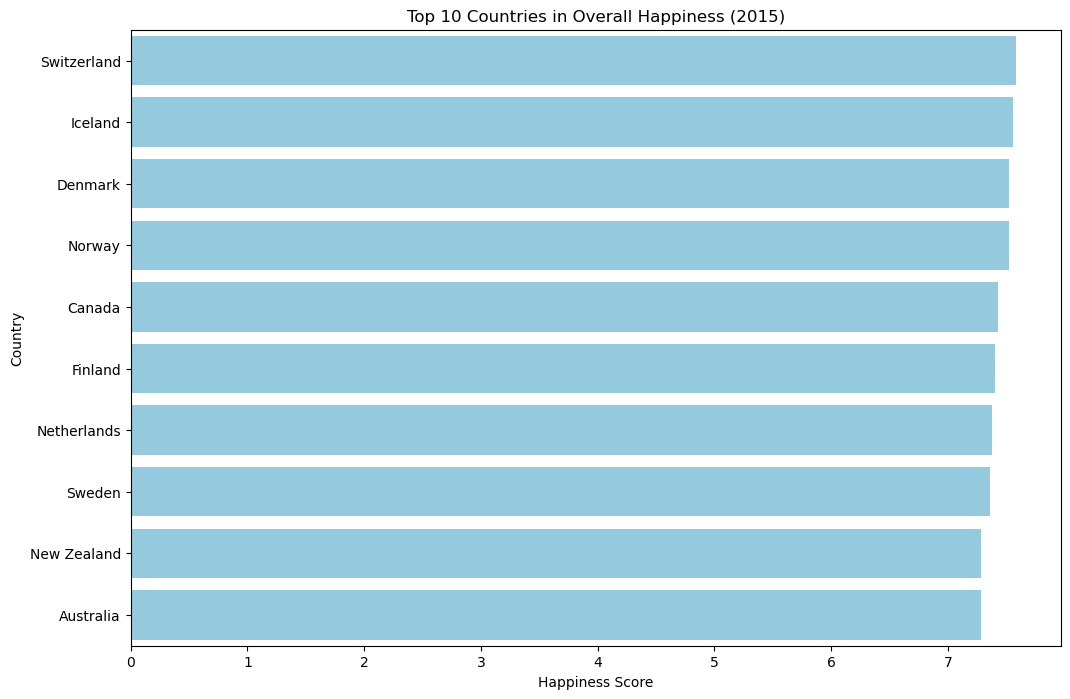

In [214]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# Example using 2015 dataset
top_countries = df_2015.nlargest(10, 'Happiness Score')

# Bar Chart for top-ranking countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Happiness Score', y='Country', color='skyblue')
plt.title('Top 10 Countries in Overall Happiness (2015)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


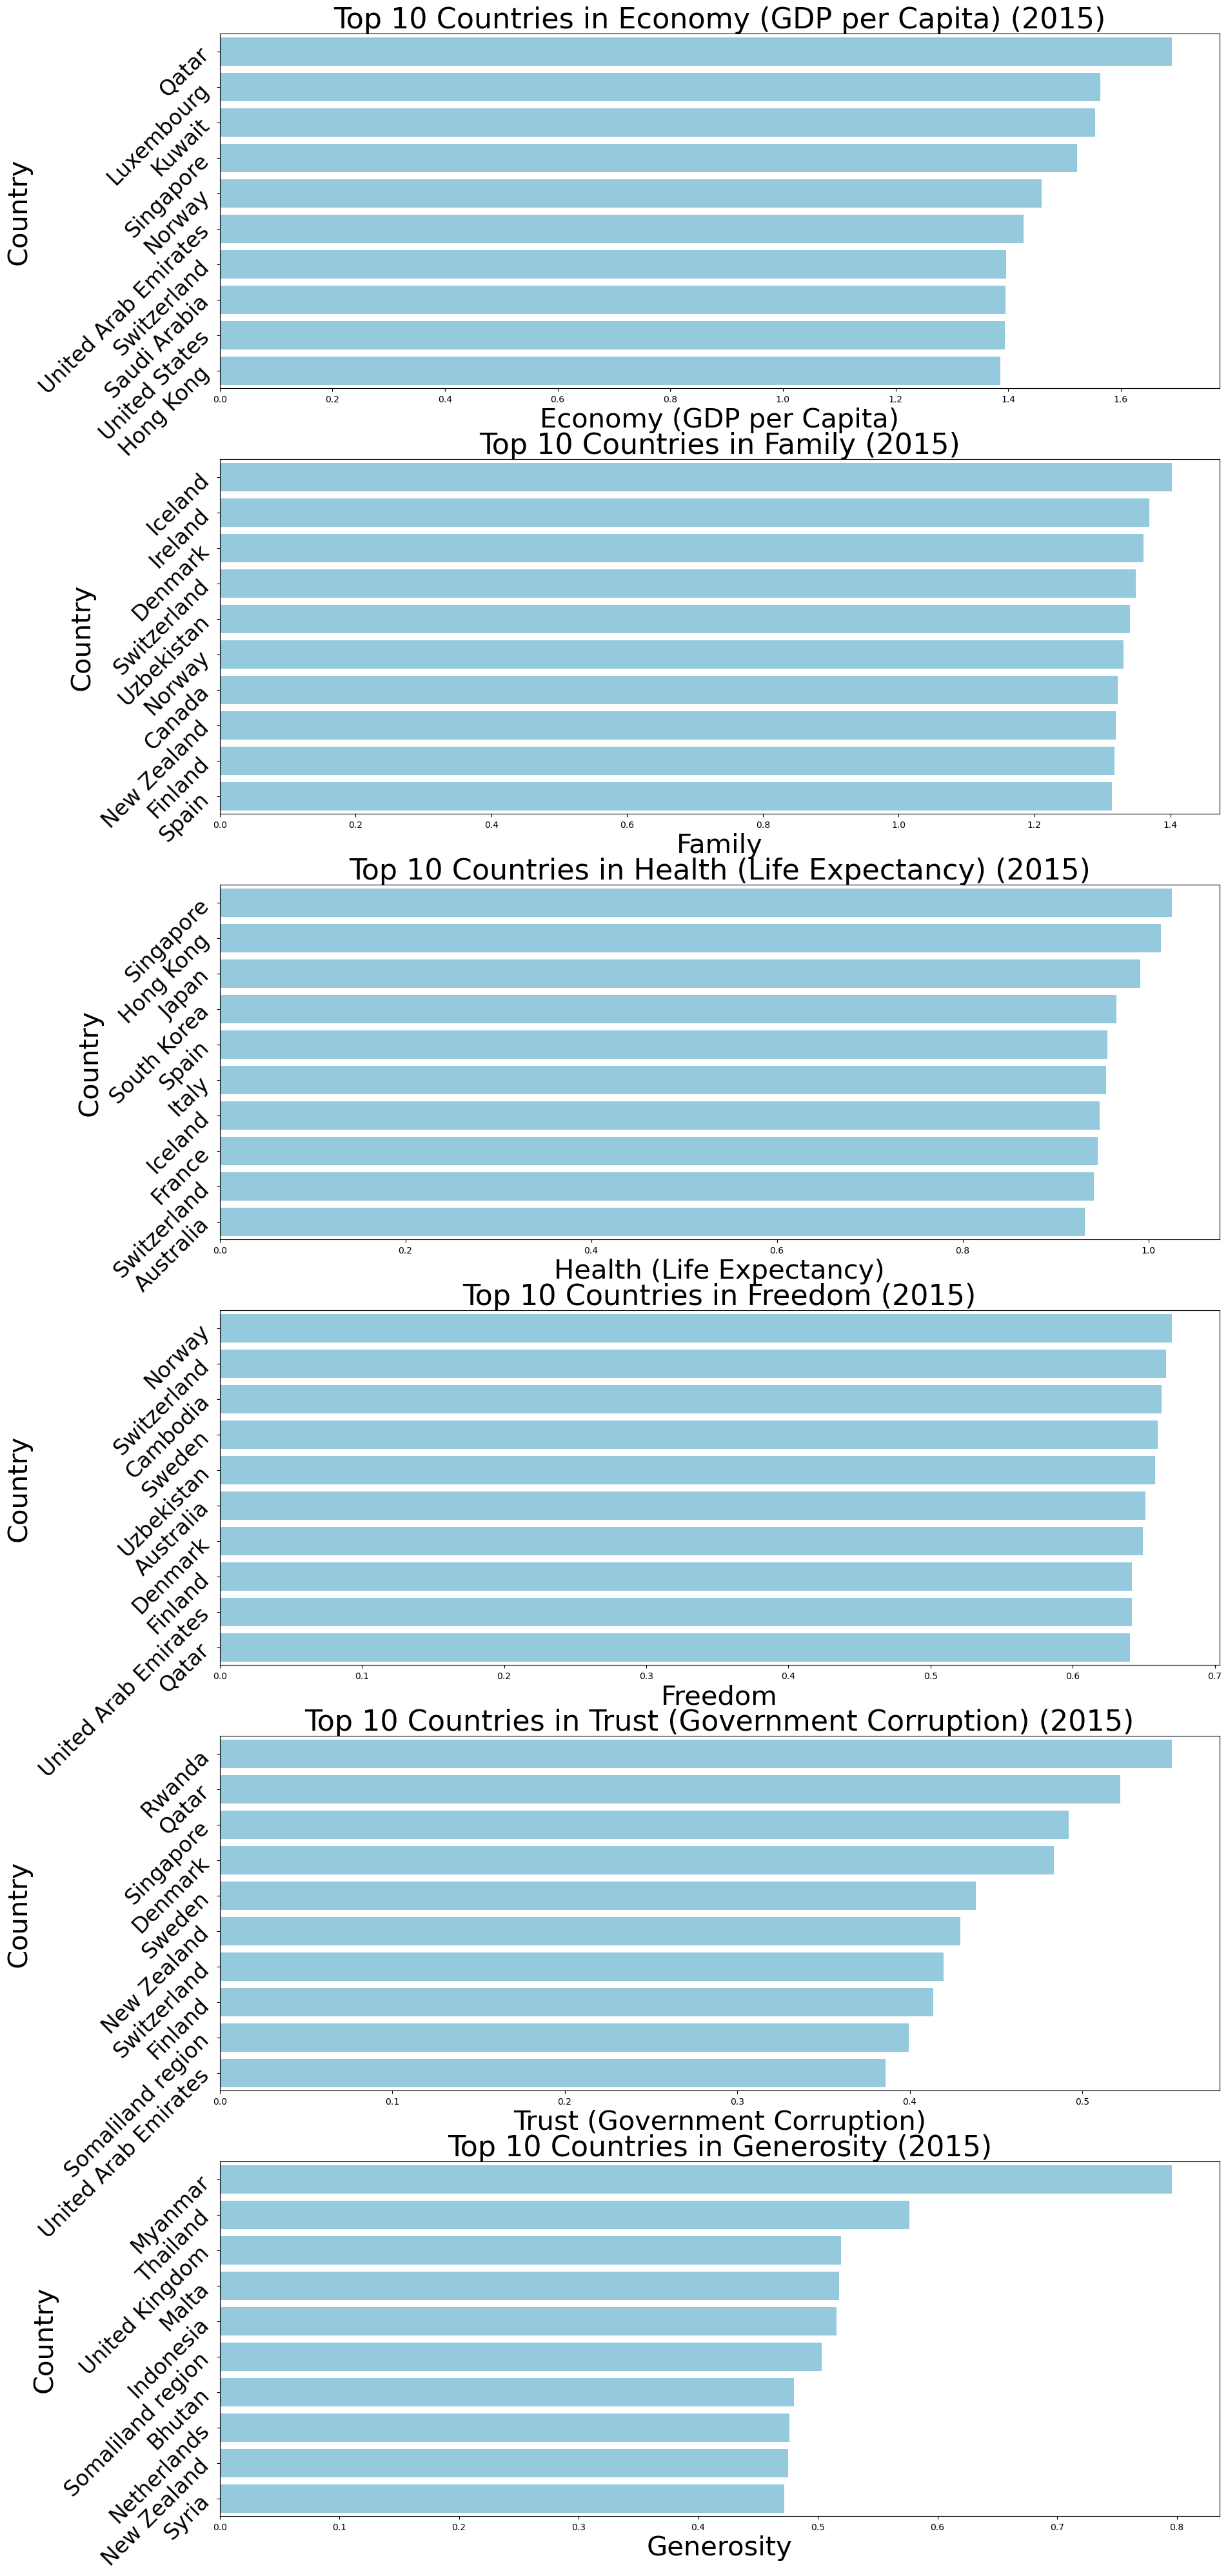

In [226]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# using 2015 dataset
# List of colmns to plot
factors = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

# Set up the subplot layout 
fig, axes = plt.subplots(len(factors), 1, figsize=(20, 50))
# Loop through each factor and create a horizontal bar plot
for i, factor in enumerate(factors):
    top_countries = df_2015.nlargest(10, factor)  
    sns.barplot(data=top_countries, x=factor, y='Country', ax=axes[i], color='skyblue', legend=False)
    axes[i].set_title(f'Top 10 Countries in {factor} (2015)', fontsize=32)
    axes[i].set_xlabel(factor, fontsize=30)
    axes[i].set_ylabel('Country', fontsize=30)
    axes[i].tick_params(axis='y', labelrotation=45, labelsize=24)



plt.show()

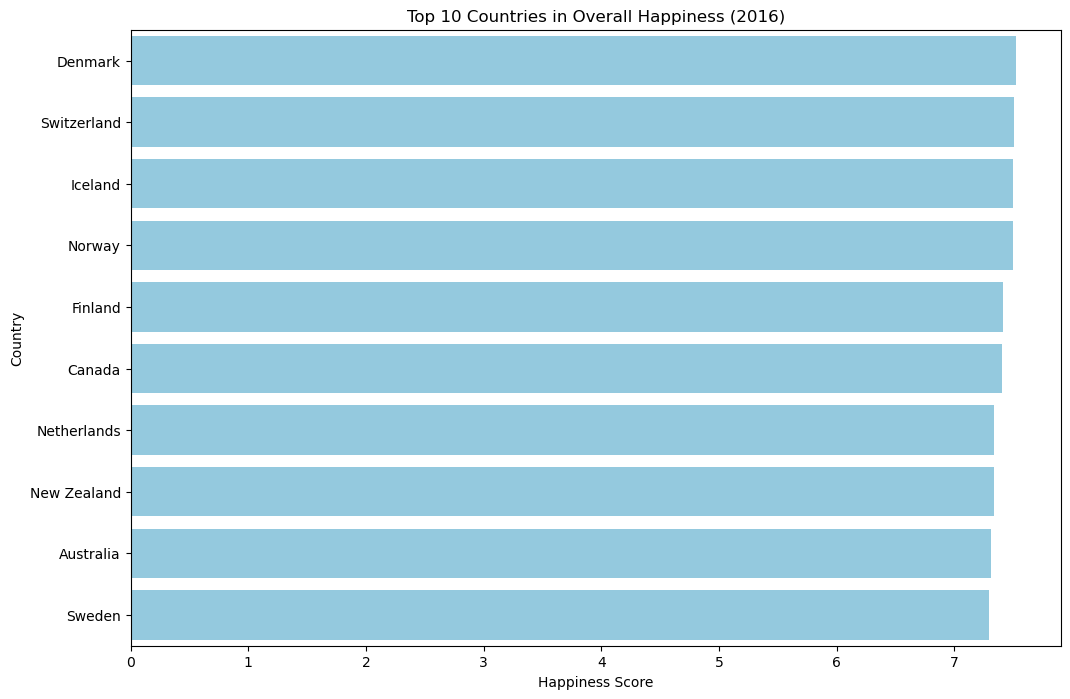

In [229]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# Example using 2016 dataset
top_countries = df_2016.nlargest(10, 'Happiness Score')

# Bar Chart for top-ranking countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Happiness Score', y='Country', color='skyblue')
plt.title('Top 10 Countries in Overall Happiness (2016)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


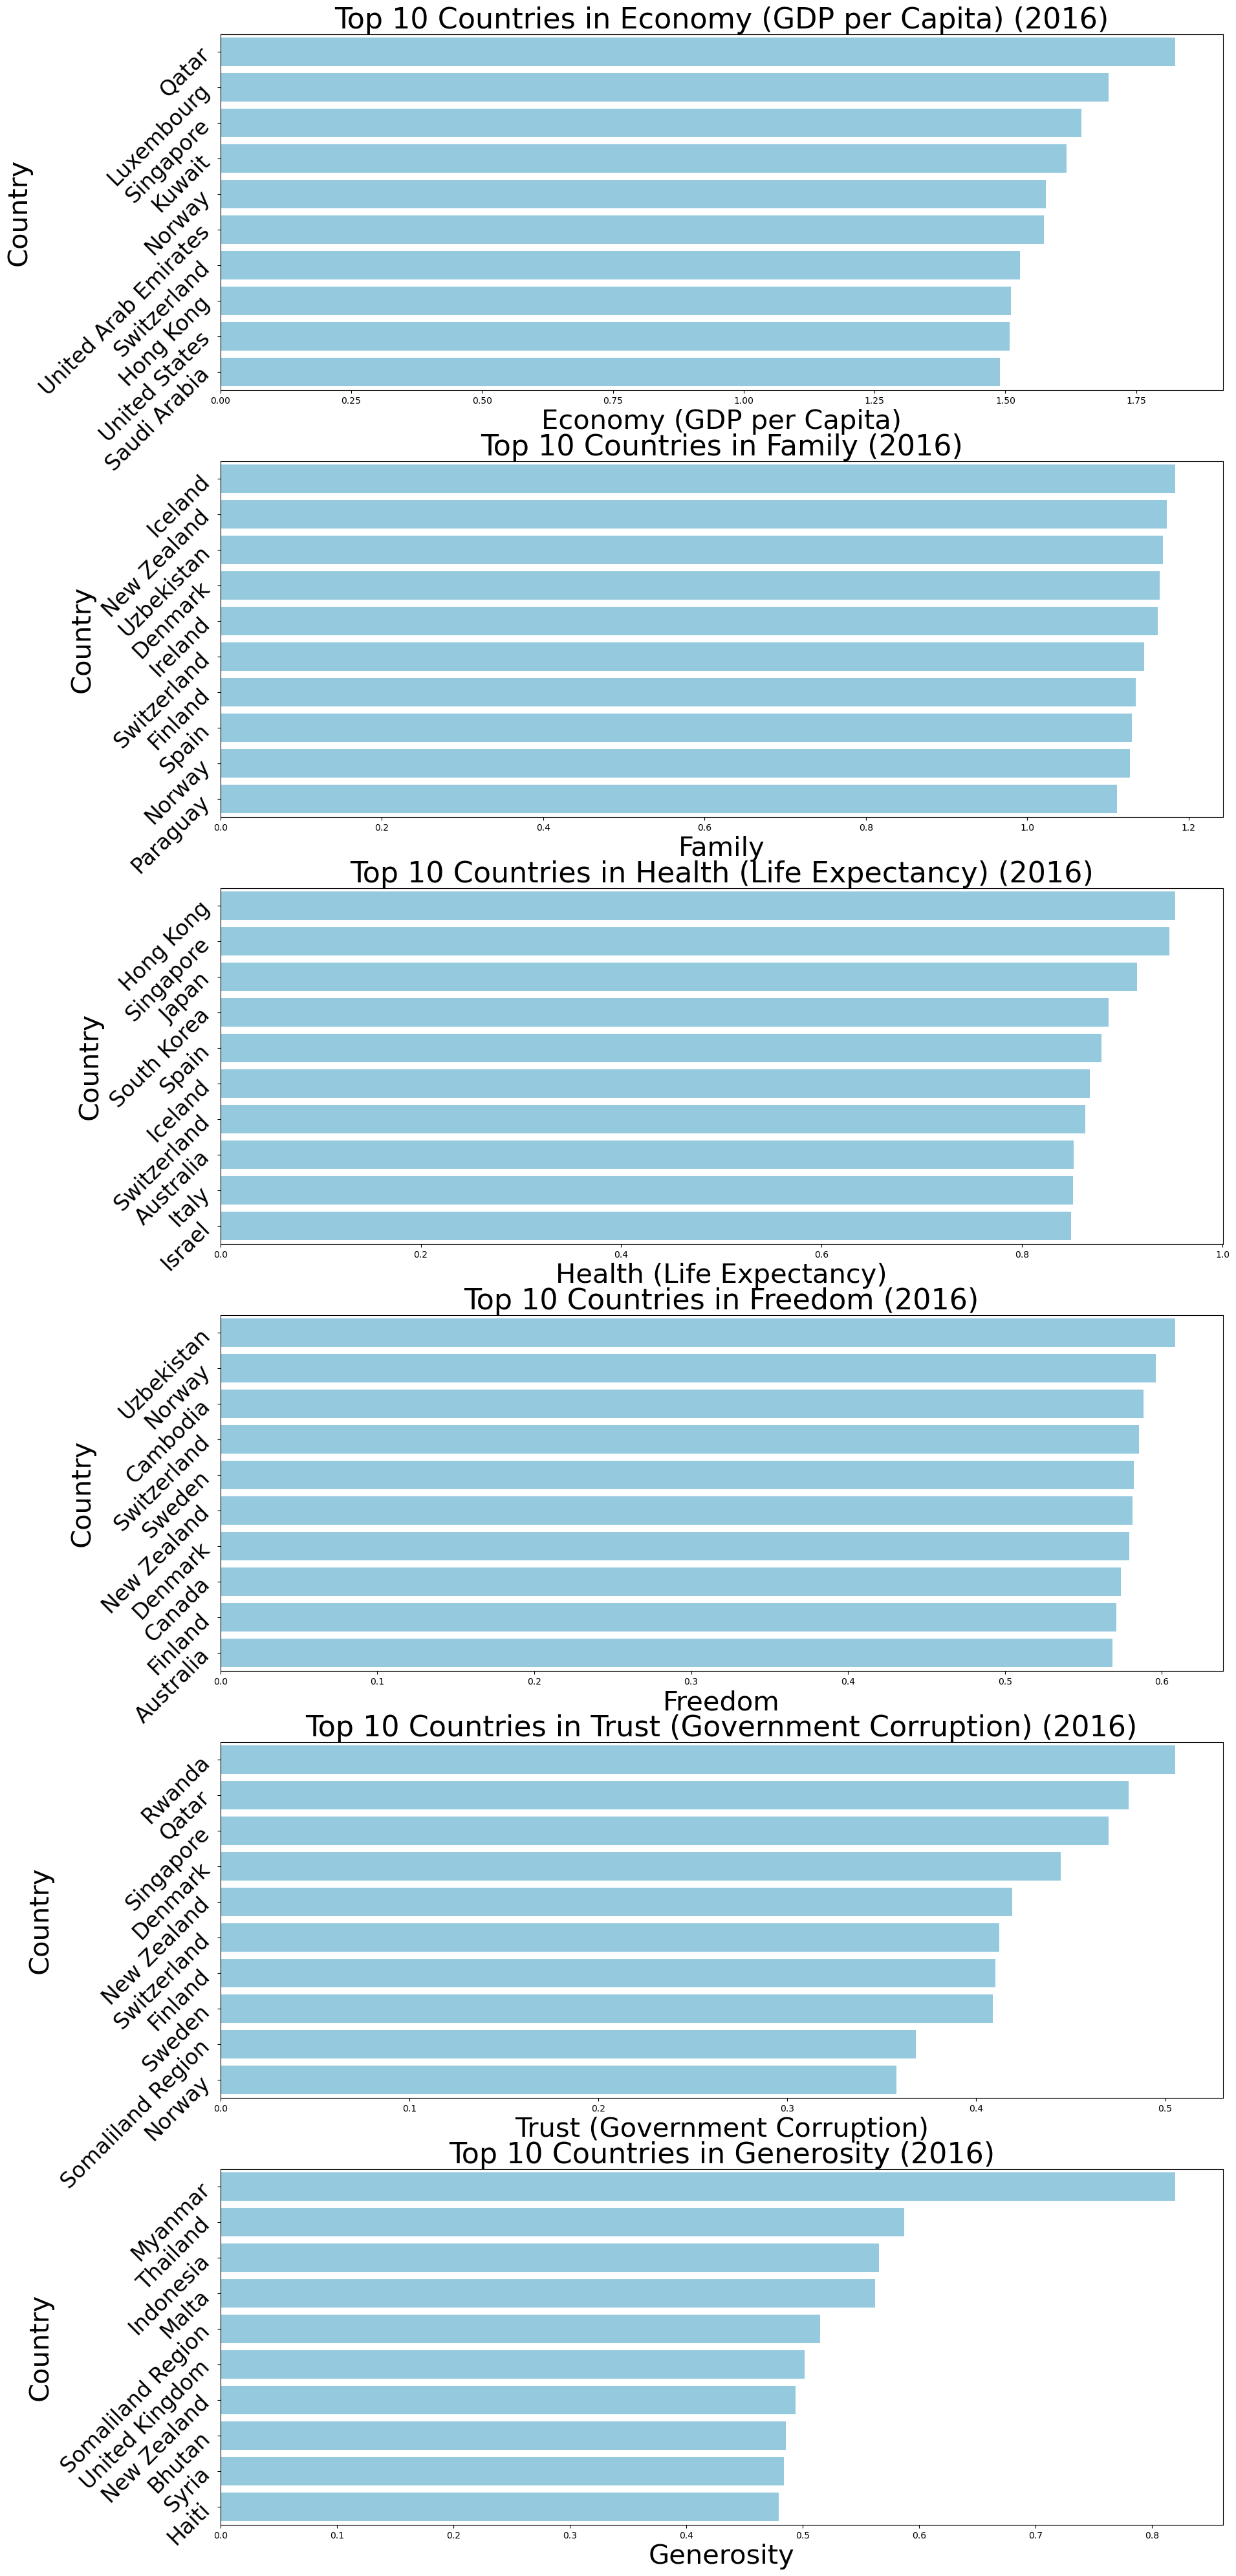

In [228]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# using 2016 dataset
# List of colmns to plot
factors = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

# Set up the subplot layout 
fig, axes = plt.subplots(len(factors), 1, figsize=(20, 50))
# Loop through each factor and create a horizontal bar plot
for i, factor in enumerate(factors):
    top_countries = df_2016.nlargest(10, factor)  
    sns.barplot(data=top_countries, x=factor, y='Country', ax=axes[i], color='skyblue', legend=False)
    axes[i].set_title(f'Top 10 Countries in {factor} (2016)', fontsize=32)
    axes[i].set_xlabel(factor, fontsize=30)
    axes[i].set_ylabel('Country', fontsize=30)
    axes[i].tick_params(axis='y', labelrotation=45, labelsize=24)



plt.show()

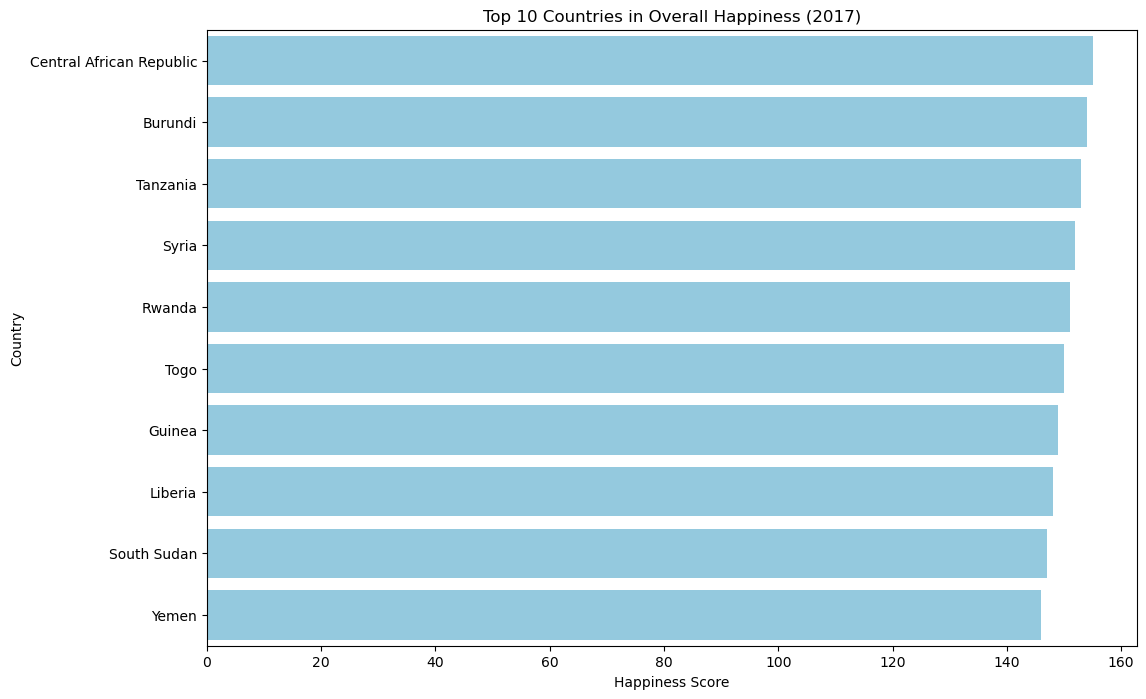

In [233]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# Example using 2017 dataset
top_countries = df_2017.nlargest(10, 'Happiness.Rank')

# Bar Chart for top-ranking countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Happiness.Rank', y='Country', color='skyblue')
plt.title('Top 10 Countries in Overall Happiness (2017)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


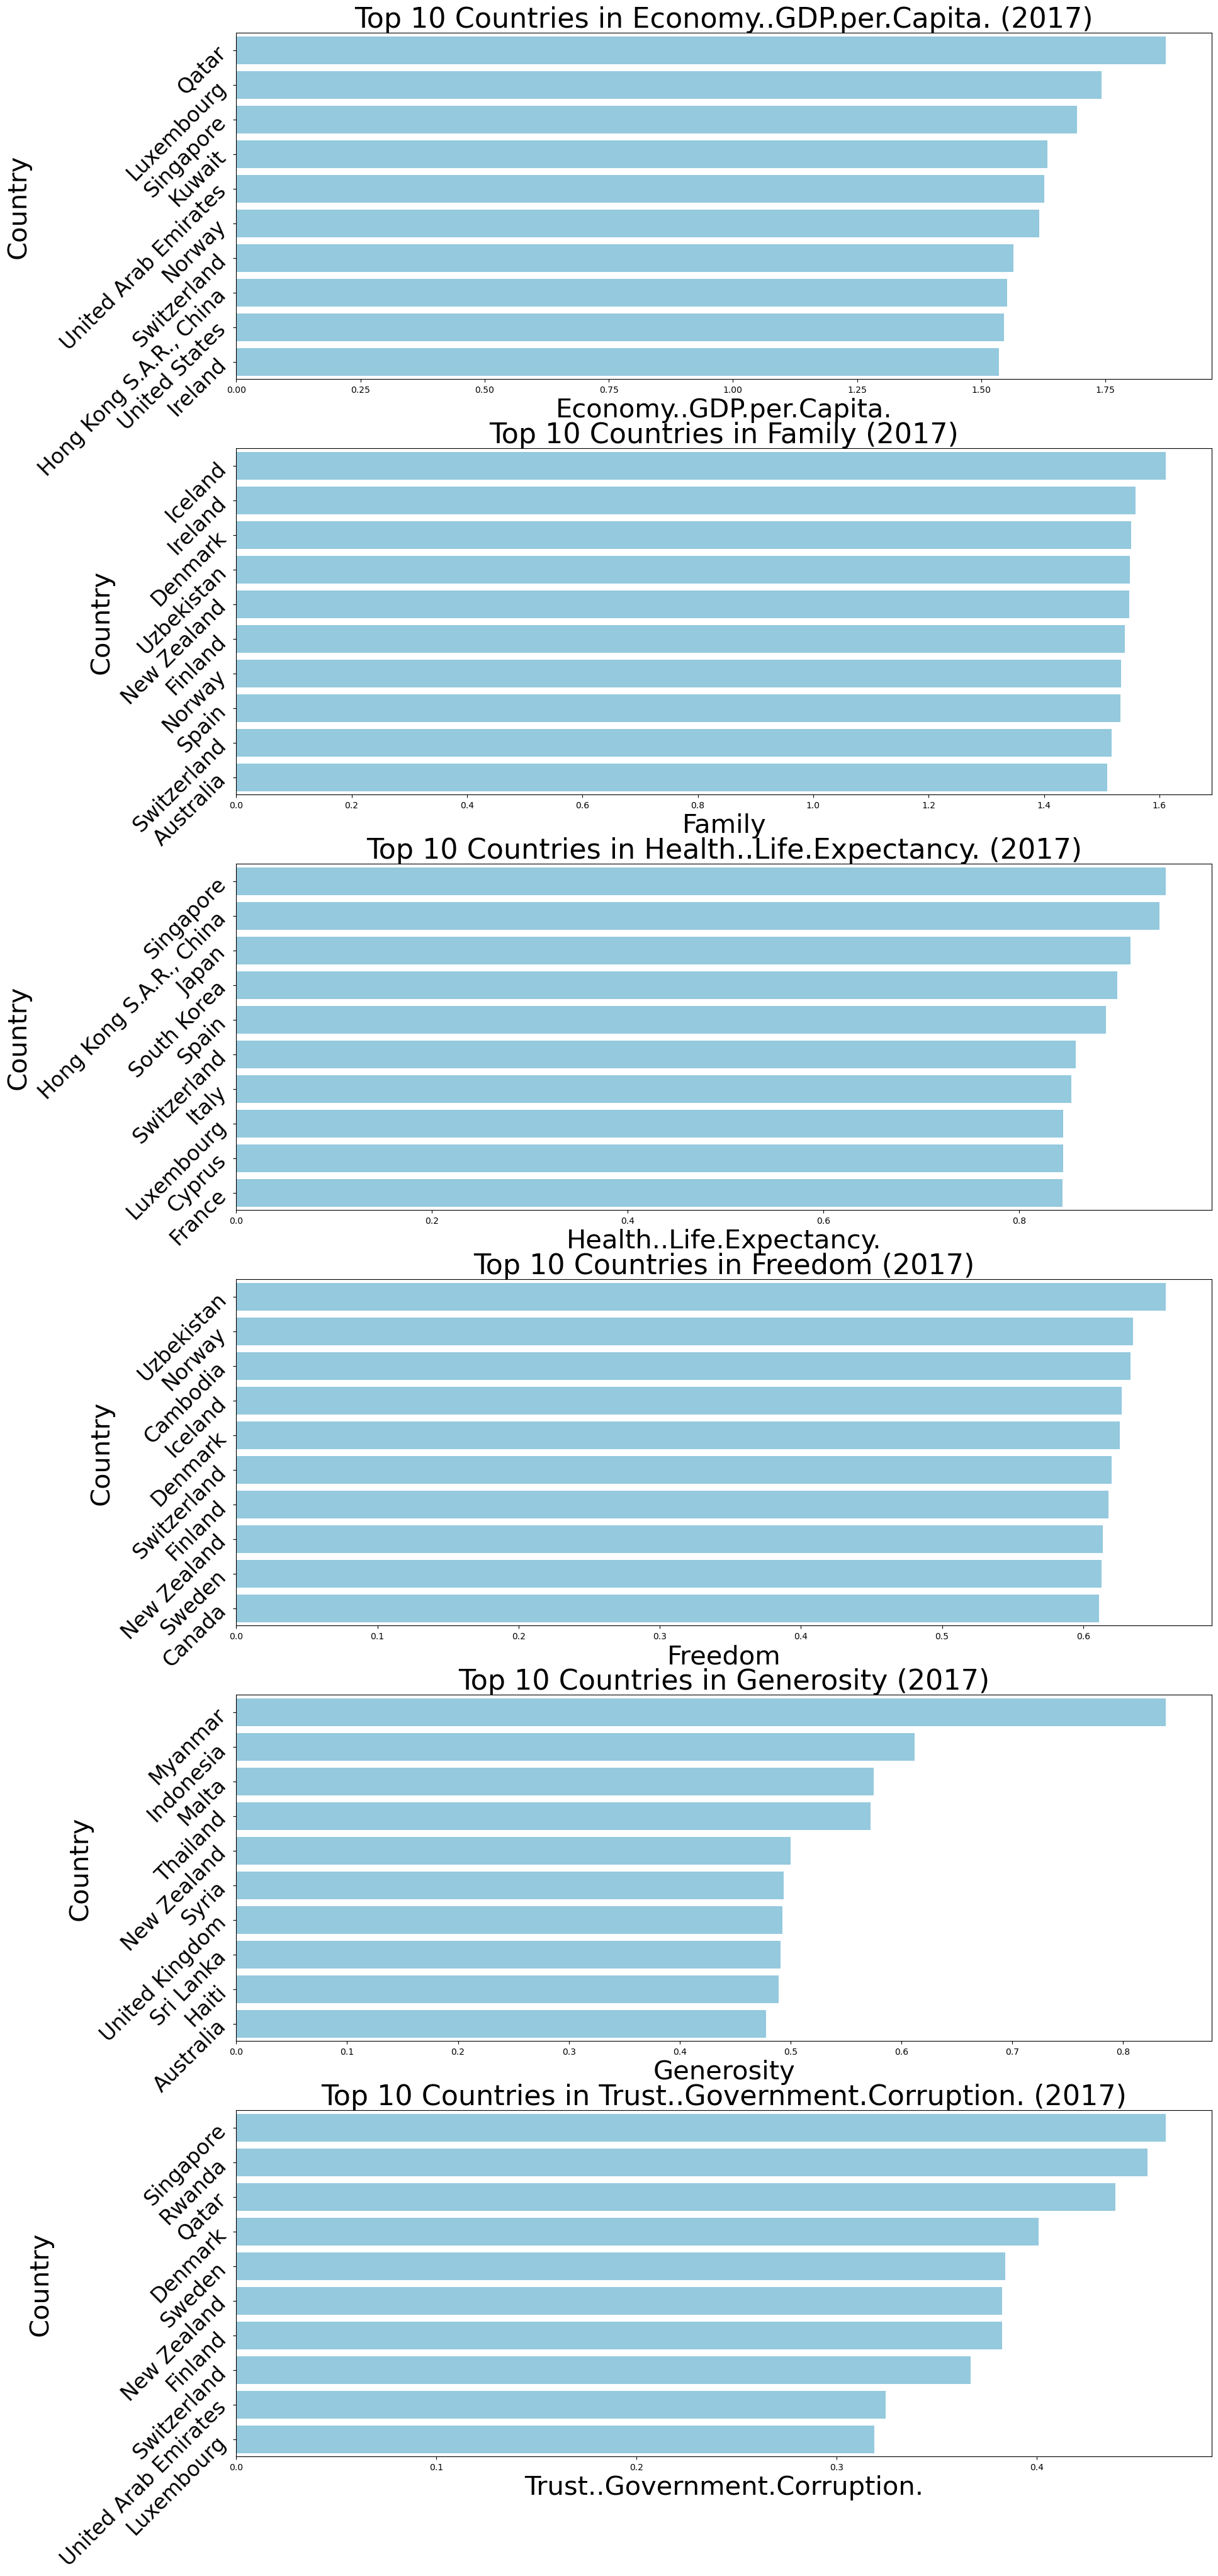

In [236]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# using 2017 dataset
# List of colmns to plot
factors = [
    'Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom','Generosity','Trust..Government.Corruption.'
]

# Set up the subplot layout 
fig, axes = plt.subplots(len(factors), 1, figsize=(20, 50))
# Loop through each factor and create a horizontal bar plot
for i, factor in enumerate(factors):
    top_countries = df_2017.nlargest(10, factor)  
    sns.barplot(data=top_countries, x=factor, y='Country', ax=axes[i], color='skyblue', legend=False)
    axes[i].set_title(f'Top 10 Countries in {factor} (2017)', fontsize=32)
    axes[i].set_xlabel(factor, fontsize=30)
    axes[i].set_ylabel('Country', fontsize=30)
    axes[i].tick_params(axis='y', labelrotation=45, labelsize=24)



plt.show()

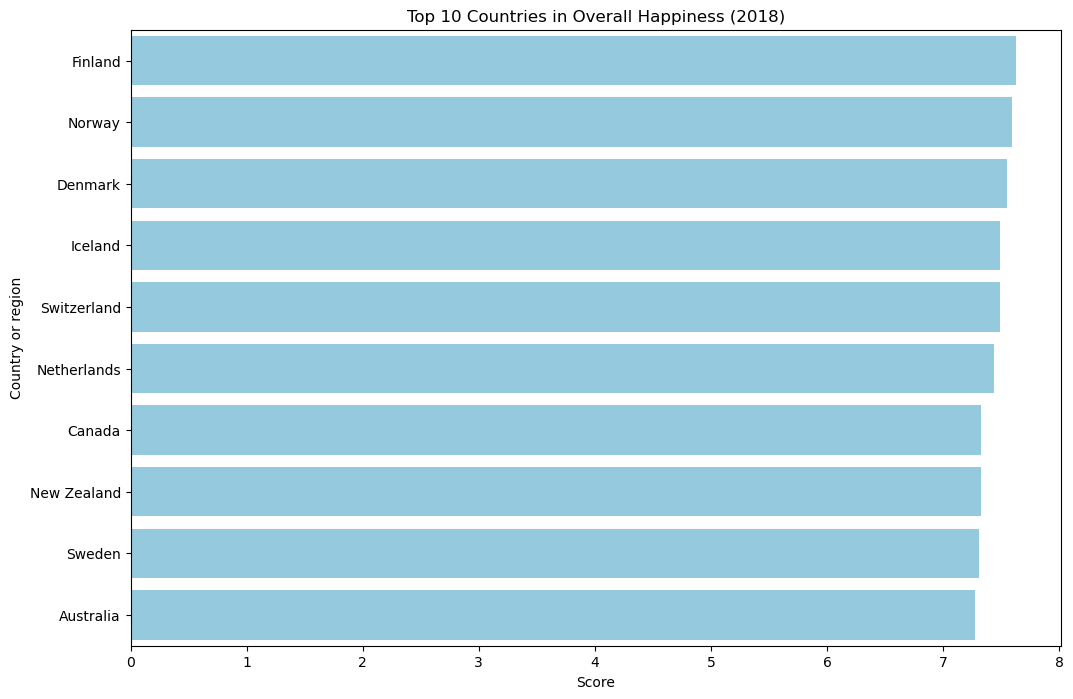

In [241]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# Example using 2018 dataset
top_countries = df_2018.nlargest(10, 'Score')

# Bar Chart for top-ranking countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Score', y='Country or region', color='skyblue')
plt.title('Top 10 Countries in Overall Happiness (2018)')
plt.xlabel('Score')
plt.ylabel('Country or region')
plt.show()


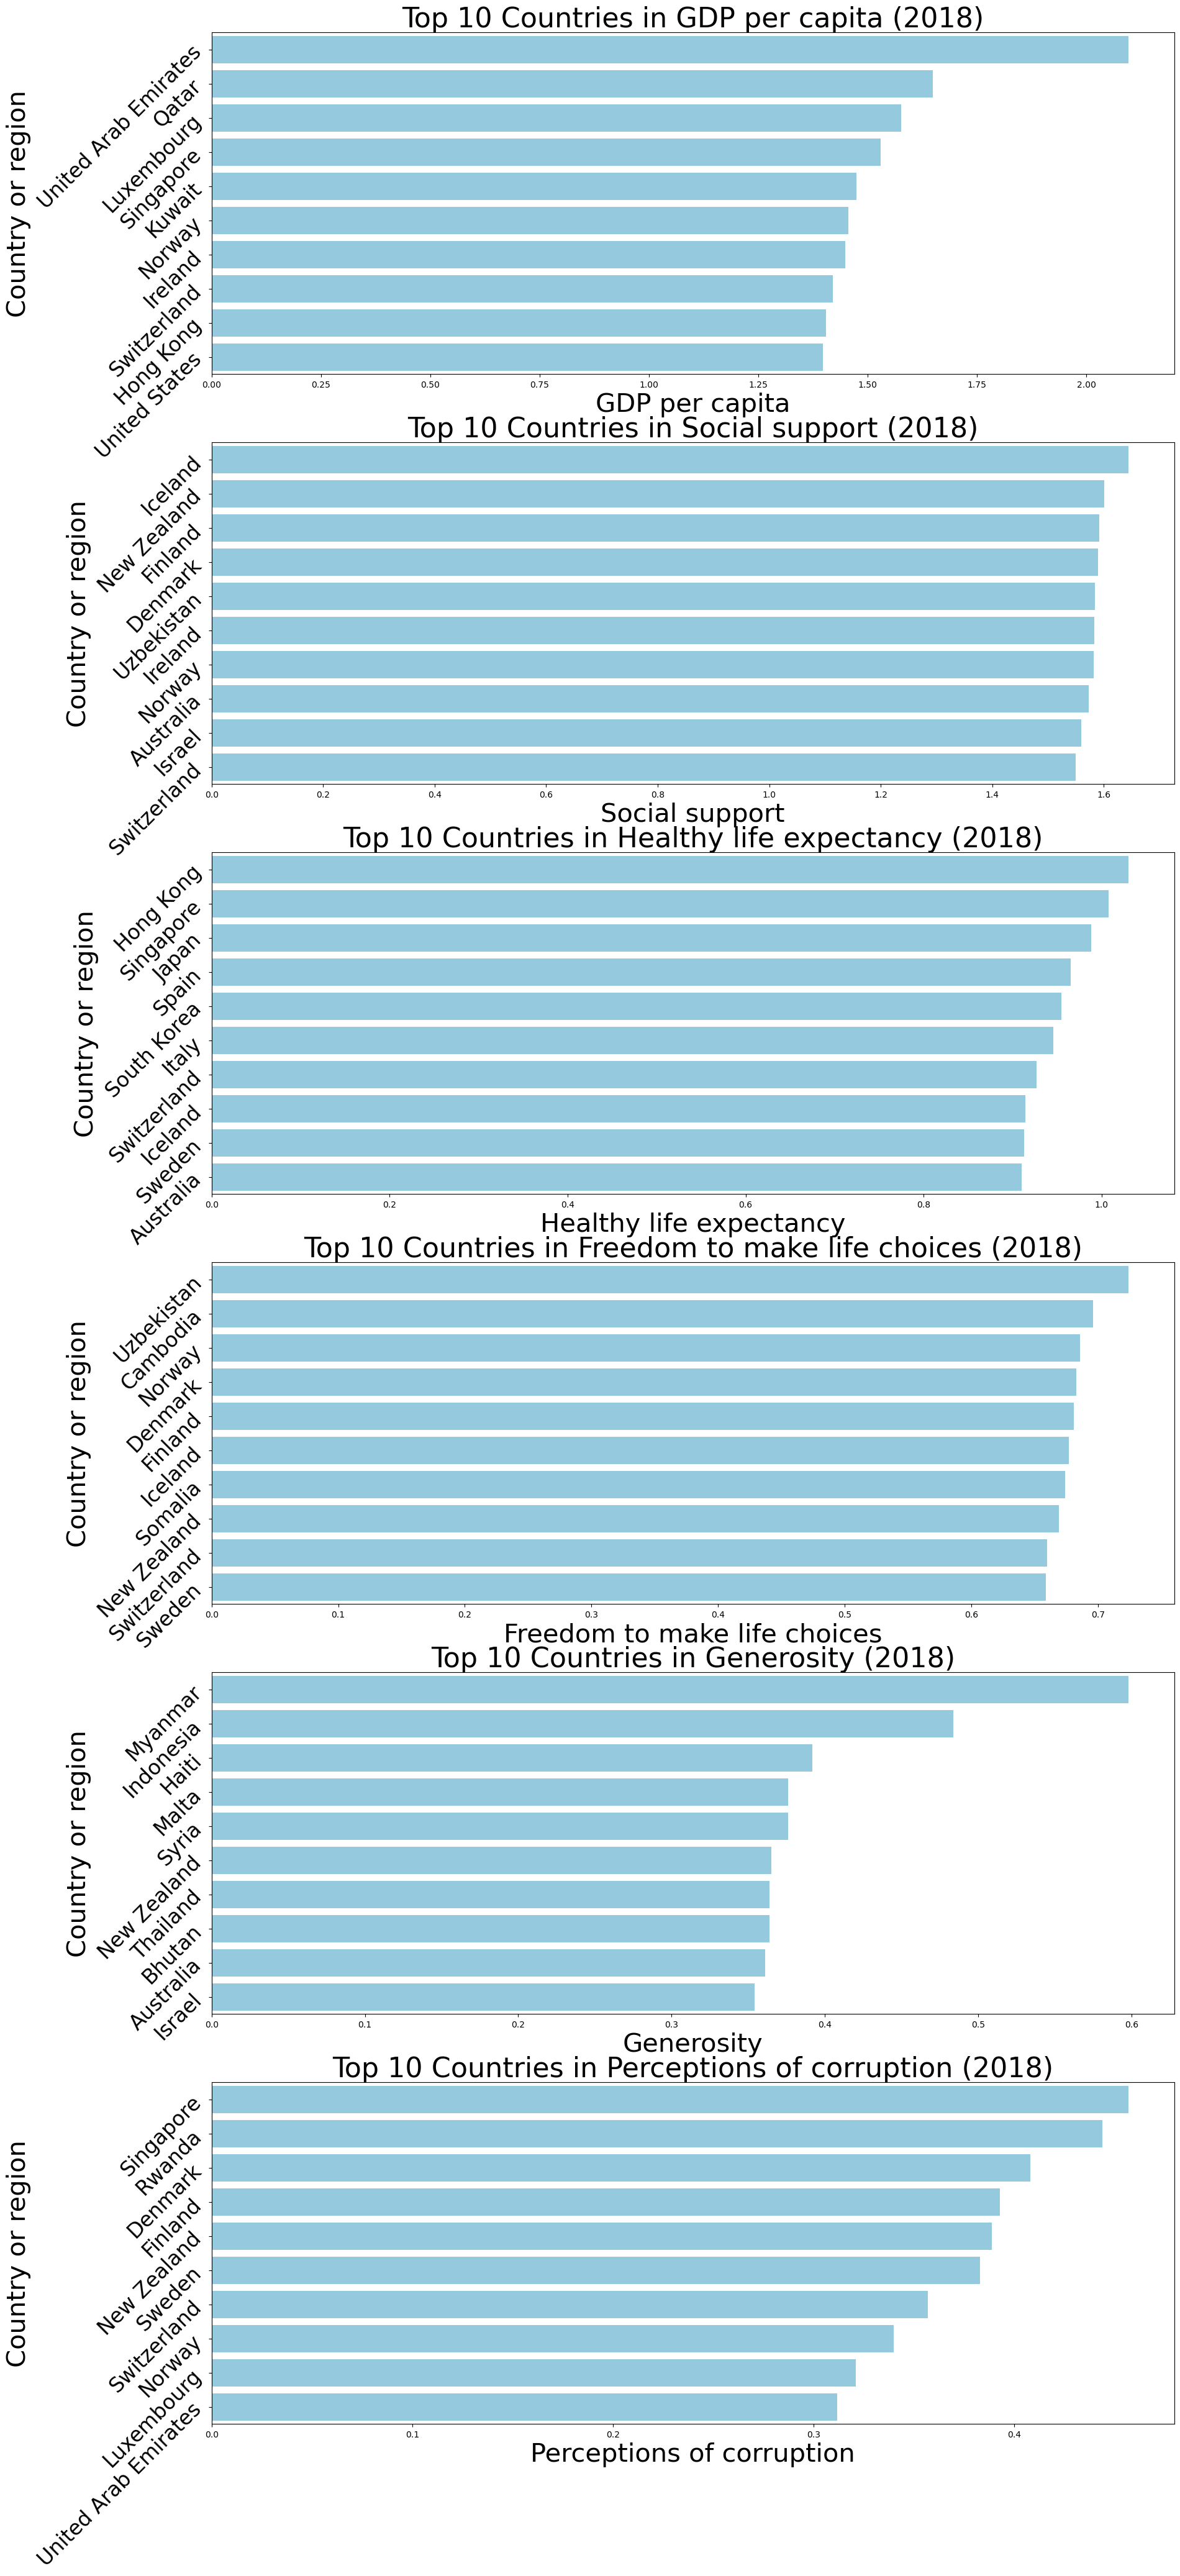

In [242]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# using 2018 dataset
# List of colmns to plot
factors = [
'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

# Set up the subplot layout 
fig, axes = plt.subplots(len(factors), 1, figsize=(20, 50))
# Loop through each factor and create a horizontal bar plot
for i, factor in enumerate(factors):
    top_countries = df_2018.nlargest(10, factor)  
    sns.barplot(data=top_countries, x=factor, y='Country or region', ax=axes[i], color='skyblue', legend=False)
    axes[i].set_title(f'Top 10 Countries in {factor} (2018)', fontsize=32)
    axes[i].set_xlabel(factor, fontsize=30)
    axes[i].set_ylabel('Country or region', fontsize=30)
    axes[i].tick_params(axis='y', labelrotation=45, labelsize=24)



plt.show()

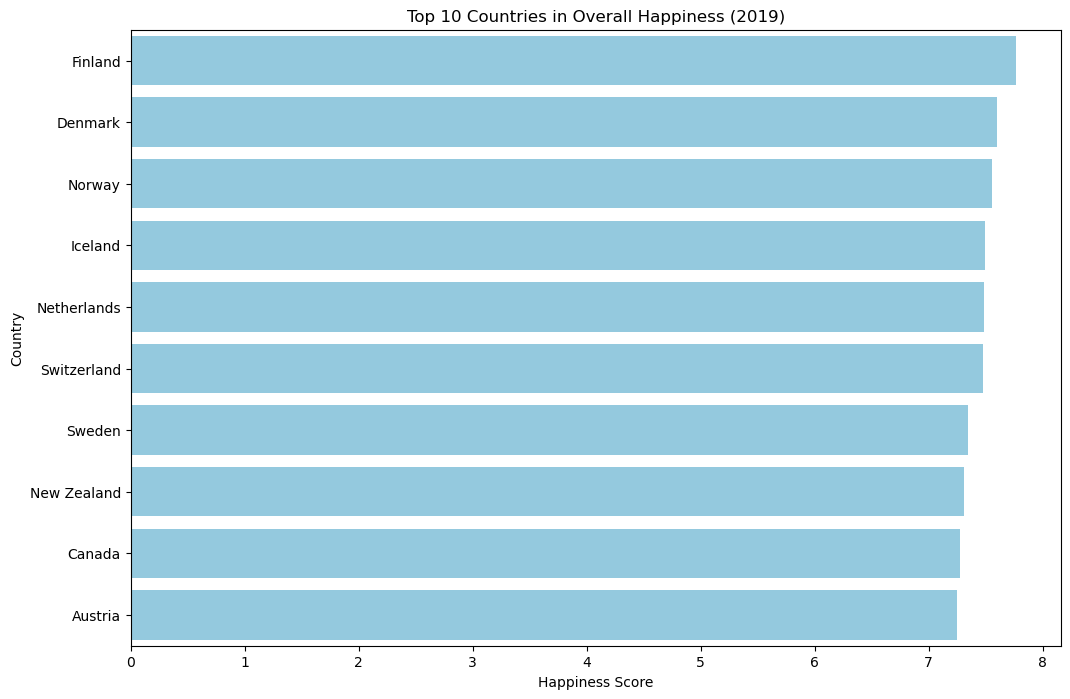

In [208]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# Example using 2019 dataset
top_countries = df_2019.nlargest(10, 'Score')

# Bar Chart for top-ranking countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Score', y='Country or region', color='skyblue')
plt.title('Top 10 Countries in Overall Happiness (2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


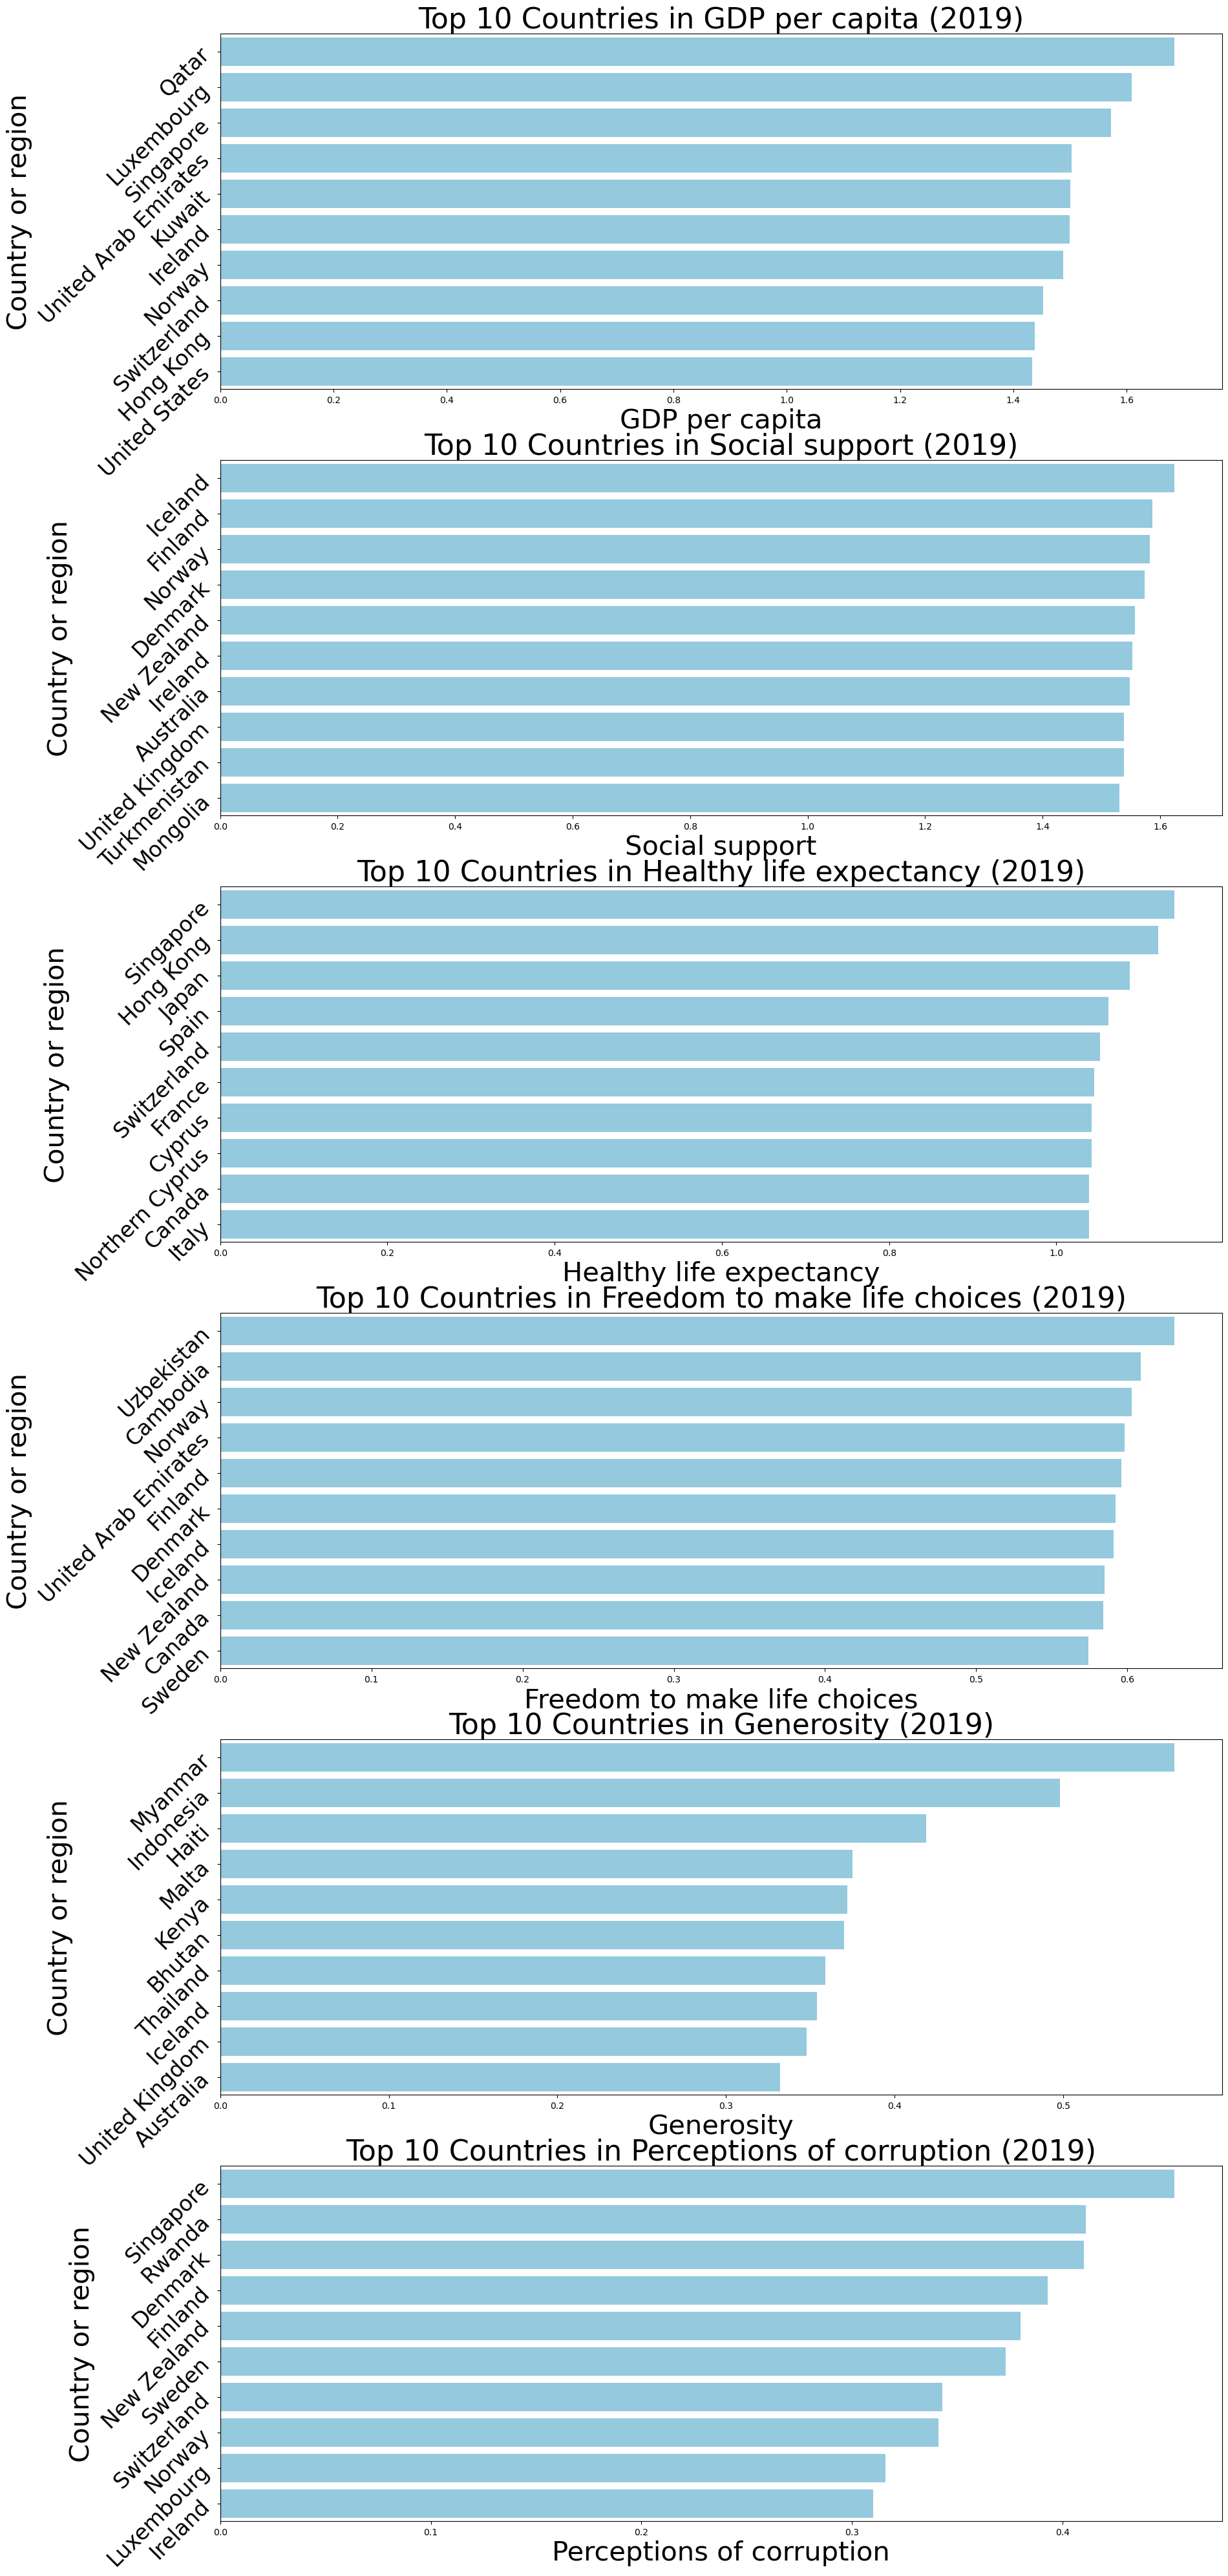

In [211]:
# Q1 What countries or regions rank the highest in overall happiness and each of
#the six factors contributing to happiness?
# using 2019 dataset
# List of colmns to plot
factors = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Set up the subplot layout 
fig, axes = plt.subplots(len(factors), 1, figsize=(20, 50))
# Loop through each factor and create a horizontal bar plot
for i, factor in enumerate(factors):
    top_countries = df_2019.nlargest(10, factor)  
    sns.barplot(data=top_countries, x=factor, y='Country or region', ax=axes[i], color='skyblue', legend=False)
    axes[i].set_title(f'Top 10 Countries in {factor} (2019)', fontsize=32)
    axes[i].set_xlabel(factor, fontsize=30)
    axes[i].set_ylabel('Country or region', fontsize=30)
    axes[i].tick_params(axis='y', labelrotation=45, labelsize=24)



plt.show()

In [245]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [246]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [256]:
# Q2 How did country ranks or scores change between the 2015 and 2016 as well
#as the 2016 and 2017 reports?

# Get the top 10 countries for 2015 based on happiness scores
top_10_2015 = df_2015.nlargest(10, 'Happiness Score')[['Country', 'Happiness Rank']]
print("Top 10 Countries in 2015:")
print(top_10_2015)

# Store the top 10 countries in a variable
top_countries = top_10_2015['Country'].tolist()

# Find the ranks of these countries in 2016
df_2016['Happiness Rank'] = df_2016['Happiness Rank'].rank(ascending=False)
top_2016_ranks = df_2016[df_2016['Country'].isin(top_countries)][['Country', 'Happiness Rank']]

# Display the ranks of the top 10 countries in 2016
print("\nthe top 10 in 2015 here is their ranks in 2016:")
print(top_2016_ranks)

Top 10 Countries in 2015:
       Country  Happiness Rank
0  Switzerland               1
1      Iceland               2
2      Denmark               3
3       Norway               4
4       Canada               5
5      Finland               6
6  Netherlands               7
7       Sweden               8
8  New Zealand               9
9    Australia              10

the top 10 in 2015 here is their ranks in 2016:
       Country  Happiness Rank
0      Denmark             1.0
1  Switzerland             2.0
2      Iceland             3.0
3       Norway             4.0
4      Finland             5.0
5       Canada             6.0
6  Netherlands             7.0
7  New Zealand             8.0
8    Australia             9.0
9       Sweden            10.0


In [260]:
# Q2 How did country ranks or scores change between the 2015 and 2016 as well
#as the 2016 and 2017 reports?

# Get the top 10 countries for 2016 based on happiness scores
top_10_2016 = df_2016.nlargest(10, 'Happiness Score')[['Country', 'Happiness Rank']]
print("\nTop 10 Countries in 2016:")
print(top_10_2016)

# Store the top 10 countries in a variable
top_countries = top_10_2016['Country'].tolist()

# Find the ranks of these countries in 2017
df_2017['Happiness.Rank'] = df_2017['Happiness.Rank'].rank(ascending=False)
top_2017_ranks = df_2017[df_2017['Country'].isin(top_countries)][['Country', 'Happiness.Rank']]

# Display the ranks of the top 10 countries in 2017
print("\nThe top 10 in 2016 and their ranks in 2017:")
print(top_2017_ranks)


Top 10 Countries in 2016:
       Country  Happiness Rank
0      Denmark             1.0
1  Switzerland             2.0
2      Iceland             3.0
3       Norway             4.0
4      Finland             5.0
5       Canada             6.0
6  Netherlands             7.0
7  New Zealand             8.0
8    Australia             9.0
9       Sweden            10.0

The top 10 in 2016 and their ranks in 2017:
       Country  Happiness.Rank
0       Norway             1.0
1      Denmark             2.0
2      Iceland             3.0
3  Switzerland             4.0
4      Finland             5.0
5  Netherlands             6.0
6       Canada             7.0
7  New Zealand             8.0
8       Sweden             9.0
9    Australia            10.0


In [257]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [265]:
#Q3 Did any country experience a significant increase or decrease in happiness?

# Merge datasets to have scores for 2015, 2016, and 2017
merged_df = df_2015[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Score_2015'})
merged_df = merged_df.merge(df_2016[['Country', 'Happiness Score']], on='Country', how='outer').rename(columns={'Happiness Score': 'Score_2016'})
merged_df = merged_df.merge(df_2017[['Country', 'Happiness.Score']], on='Country', how='outer').rename(columns={'Happiness.Score': 'Score_2017'})



In [266]:
# Calculate the change in scores
merged_df['Change_2015_2016'] = merged_df['Score_2016'] - merged_df['Score_2015']
merged_df['Change_2016_2017'] = merged_df['Score_2017'] - merged_df['Score_2016']


In [267]:
# Define significant change threshold
threshold = 0.5

# Filter countries with significant changes
significant_increases = merged_df[(merged_df['Change_2015_2016'] > threshold) | (merged_df['Change_2016_2017'] > threshold)]
significant_decreases = merged_df[(merged_df['Change_2015_2016'] < -threshold) | (merged_df['Change_2016_2017'] < -threshold)]

# Display results
print("\nCountries with significant increases in happiness:")
print(significant_increases[['Country', 'Change_2015_2016', 'Change_2016_2017']])

print("\nCountries with significant decreases in happiness:")
print(significant_decreases[['Country', 'Change_2015_2016', 'Change_2016_2017']])


Countries with significant increases in happiness:
   Country  Change_2015_2016  Change_2016_2017
2  Algeria              0.75            -0.483

Countries with significant decreases in happiness:
       Country  Change_2015_2016  Change_2016_2017
81     Liberia            -0.949            -0.089
161  Venezuela            -0.726            -0.834


We could also use a correlation matrix to get more specific information about the relationship between these two variables.